In [38]:
import numpy as np
import numpy
import pyscf
import pyscf.gto
import pyscf.qmmm
import pyscf.scf
import pyscf.dft
import pyscf.lib
from pyscf.data import nist

angstrom = 1 / 0.52917721067

def build_grid():
    
    xs = np.linspace(-7, 7, 140)
    ys = np.linspace(-3, 3, 60)
    points = np.zeros((len(xs)*len(ys), 3))
    row = 0
    for x in range(len(xs)):
        for y in range(len(ys)):
            points[row, 0]= xs[x]
            points[row, 1]= ys[y]
            row += 1
    return points
gridpts = build_grid() * angstrom


In [39]:
def get_rho(deltaZ):
    mol = pyscf.gto.Mole()
    mol.atom = """6 -5.3353    0.4888   -0.0001;  
    6 -5.2357   -0.9177   -0.0002 ; 
    6 -3.9787   -1.5370   -0.0002  ;
    6 -2.8410   -0.7375    0.0000  ;
    6 -2.9447    0.6389    0.0001  ;
    6 -4.1806    1.2842    0.0001  ;
    6 -1.5660    1.1746   -0.0001  ;
    8 -1.2489    2.3641    0.0001  ;
    6 -0.6762   -0.0428   -0.0005  ;
    6  0.6761    0.0427   -0.0001  ;
    6  1.5659   -1.1746    0.0002  ;
    8  1.2488   -2.3640    0.0003  ;
    6  2.9446   -0.6389   -0.0001  ;
    6  4.1805   -1.2844    0.0004  ;
    6  5.3352   -0.4889    0.0003  ;
    6  5.2355    0.9175    0.0004  ;
    6  3.9786    1.5369    0.0001  ;
    6  2.8409    0.7375   -0.0015  ;
    7  1.5073    1.1439    0.0004  ;
    7 -1.5074   -1.1439   -0.0005  ;
    1 -6.3145    0.9563   -0.0002  ;
    1 -6.1362   -1.5227   -0.0003  ;
    1 -3.8984   -2.6217   -0.0003  ;
    1 -4.2400    2.3710    0.0002  ;
    1  4.2398   -2.3712    0.0007  ;
    1  6.3143   -0.9565    0.0003  ;
    1  6.1361    1.5225    0.0010  ;
    1  3.8983    2.6217    0.0008  ;
    1  1.1649    2.1050   -0.0089  ;
    1 -1.1651   -2.1051    0.0001 """
    mol.basis = "STO-3G"
    mol.verbose = 0
    mol.build()
    
    includeonly = np.array(range(30))
    def add_qmmm(calc, mol, deltaZ):
        mf = pyscf.qmmm.mm_charge(calc, mol.atom_coords()[includeonly]/ angstrom, deltaZ)

        class NoSelfQMMM(mf.__class__):
            def energy_nuc(self):
                q = mol.atom_charges().astype(np.float)
                q[includeonly] += deltaZ
                return mol.energy_nuc(q)

        return NoSelfQMMM()

    calc = add_qmmm(pyscf.scf.RHF(mol), mol, deltaZ)
    hfe = calc.kernel(verbose=0)
    dm1_ao = calc.make_rdm1()
    total_energy = calc.e_tot
    ao_value = pyscf.dft.numint.eval_ao(mol, gridpts, deriv=0)
    rho = pyscf.dft.numint.eval_rho(mol, ao_value, dm1_ao, xctype="LDA")
    return rho

In [40]:
rho_center = get_rho(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
rho_fwd = get_rho(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.05]))
rho_bwd = get_rho(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -0.05]))

In [115]:
indigo = pyscf.gto.Mole()
indigo.atom = """6 -5.3353    0.4888   -0.0001;  
6 -5.2357   -0.9177   -0.0002 ; 
6 -3.9787   -1.5370   -0.0002  ;
6 -2.8410   -0.7375    0.0000  ;
6 -2.9447    0.6389    0.0001  ;
6 -4.1806    1.2842    0.0001  ;
6 -1.5660    1.1746   -0.0001  ;
8 -1.2489    2.3641    0.0001  ;
6 -0.6762   -0.0428   -0.0005  ;
6  0.6761    0.0427   -0.0001  ;
6  1.5659   -1.1746    0.0002  ;
8  1.2488   -2.3640    0.0003  ;
6  2.9446   -0.6389   -0.0001  ;
6  4.1805   -1.2844    0.0004  ;
6  5.3352   -0.4889    0.0003  ;
6  5.2355    0.9175    0.0004  ;
6  3.9786    1.5369    0.0001  ;
6  2.8409    0.7375   -0.0015  ;
7  1.5073    1.1439    0.0004  ;
7 -1.5074   -1.1439   -0.0005  ;
1 -6.3145    0.9563   -0.0002  ;
1 -6.1362   -1.5227   -0.0003  ;
1 -3.8984   -2.6217   -0.0003  ;
1 -4.2400    2.3710    0.0002  ;
1  4.2398   -2.3712    0.0007  ;
1  6.3143   -0.9565    0.0003  ;
1  6.1361    1.5225    0.0010  ;
1  3.8983    2.6217    0.0008  ;
1  1.1649    2.1050   -0.0089  ;
1 -1.1651   -2.1051    0.0001 """
indigo.basis = "STO-3G"
indigo.verbose = 0
indigo.build()

array([[-1.00822558e+01,  9.23698130e-01, -1.88972612e-04],
       [-9.89403907e+00, -1.73420166e+00, -3.77945225e-04],
       [-7.51865333e+00, -2.90450905e+00, -3.77945225e-04],
       [-5.36871192e+00, -1.39367302e+00,  0.00000000e+00],
       [-5.56467652e+00,  1.20734602e+00,  1.88972612e-04],
       [-7.90018904e+00,  2.42678629e+00,  1.88972612e-04],
       [-2.95931111e+00,  2.21967231e+00, -1.88972612e-04],
       [-2.36007896e+00,  4.46750153e+00,  1.88972612e-04],
       [-1.27783281e+00, -8.08802781e-02, -9.44863062e-04],
       [ 1.27764383e+00,  8.06913055e-02, -1.88972612e-04],
       [ 2.95912214e+00, -2.21967231e+00,  3.77945225e-04],
       [ 2.35988998e+00, -4.46731256e+00,  5.66917837e-04],
       [ 5.56448755e+00, -1.20734602e+00, -1.88972612e-04],
       [ 7.90000006e+00, -2.42716423e+00,  7.55890450e-04],
       [ 1.00820668e+01, -9.23887102e-01,  5.66917837e-04],
       [ 9.89366113e+00,  1.73382372e+00,  7.55890450e-04],
       [ 7.51846436e+00,  2.90432008e+00

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


Text(0.5, 1.0, 'Second Derivative')

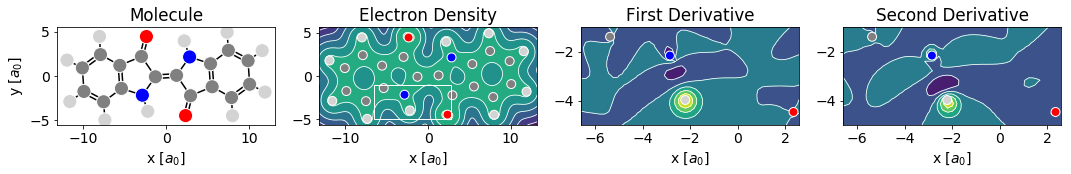

In [125]:
plt.rc('font', size=14)
f, axs = plt.subplots(1,4, figsize=(18,1.8))
xs = sorted(set(gridpts[:, 0]))
ys = sorted(set(gridpts[:, 1]))

# molecule
axs[0].set_ylabel('y [$a_0$]')
#axs[0].set_aspect('equal')
colors = {6: 'grey', 1: 'lightgrey', 7: 'blue', 8: 'red'}
outlinecolors = {6: 'white', 1: 'white', 7: 'white', 8: 'white'}
coordinates = indigo.atom_coords()
axs[0].set_title('Molecule')
axs[0].set_xlabel('x [$a_0$]')
axs[0].scatter(coordinates[:, 0], coordinates[:, 1],edgecolors=[outlinecolors[_] for _ in indigo.atom_charges()], c=[colors[_] for _ in indigo.atom_charges()], s=200)
axs[1].scatter(coordinates[:, 0], coordinates[:, 1],edgecolors=[outlinecolors[_] for _ in indigo.atom_charges()], c=[colors[_] for _ in indigo.atom_charges()], s=80, zorder=100)
axs[2].scatter(coordinates[:, 0], coordinates[:, 1],edgecolors=[outlinecolors[_] for _ in indigo.atom_charges()], c=[colors[_] for _ in indigo.atom_charges()], s=80, zorder=100)
axs[3].scatter(coordinates[:, 0], coordinates[:, 1],edgecolors=[outlinecolors[_] for _ in indigo.atom_charges()], c=[colors[_] for _ in indigo.atom_charges()], s=80, zorder=100)
def draw_bond(a, b, order):
    if order == 2:
        delta = coordinates[b, 0:2] - coordinates[a, 0:2]
        delta[1] *= -1
        delta = np.array((delta[1], delta[0]))
        delta /= np.linalg.norm(delta)
        shift = delta*0.2
        xs = coordinates[[a, b], 0] + shift[0]
        ys = coordinates[[a, b], 1] + shift[1]
        axs[0].plot(xs, ys, color='black', zorder=-1)
        xs = coordinates[[a, b], 0] - shift[0]
        ys = coordinates[[a, b], 1] - shift[1]
        axs[0].plot(xs, ys, color='black', zorder=-1)
    else:
        axs[0].plot(coordinates[[a, b], 0], coordinates[[a, b], 1], color='black', zorder=-1)
#for aidx in range(c.natoms):
#    axs.text(c.coordinates[aidx, 0], c.coordinates[aidx, 1], str(aidx))


bondspec = """ 1  2  1
 2  3  2
 3  4  1
 4  5  2
 5  6  1
 1  6  2
 5  7  1
 7  8  2
 7  9  1
 9 10  2
10 11  1
11 12  2
11 13  1
13 14  1
14 15  2
15 16  1
16 17  2
17 18  1
13 18  2
18 19  1
10 19  1
 9 20  1
 4 20  1
 1 21  1
 2 22  1
 3 23  1
 6 24  1
14 25  1
15 26  1
16 27  1
17 28  1
19 29  1
20 30  1"""
for line in bondspec.split('\n'):
    parts = line.strip().split()
    draw_bond(int(parts[0])-1, int(parts[1])-1, int(parts[2]))
    
# ref rho
rho = rho_center
axs[1].contourf(xs,ys, np.log(rho.reshape(140, 60).T))
axs[1].contour(xs,ys, np.log(rho.reshape(140, 60).T), colors='white', linestyles='solid', linewidths=0.8)
rect = patches.Rectangle((-6.6,-5),9.33,4,linewidth=1,edgecolor='white',facecolor='none', zorder=100)
axs[1].add_patch(rect)
axs[1].set_xlabel('x [$a_0$]')
#axs[1].set_ylabel('y [$a_0$]')
axs[1].set_title('Electron Density')

# partial 1
rho = rho_fwd - rho_bwd
#levels = np.exp(np.percentile(np.log(np.abs(rho)), (0, 0.2, 0.4, 0.6, 0.8, 1.)))
#levels = list(-levels)[::-1] + list(levels)[1:]
levels = (-0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04)
axs[2].contourf(xs,ys, (rho.reshape(140, 60).T), levels=levels)
axs[2].contour(xs,ys, (rho.reshape(140, 60).T), colors='white', linestyles='solid', linewidths=0.8, levels=levels)
axs[2].set_xlim(-6.6, 2.6)
axs[2].set_ylim(-5, -1)
axs[2].set_xlabel('x [$a_0$]')
#axs[2].set_ylabel('y [$a_0$]')
axs[2].set_title('First Derivative')

# partial 2
rho = rho_fwd + rho_bwd - 2*rho_center
levels = (-0.0002, -0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004)
axs[3].contourf(xs,ys, (rho.reshape(140, 60).T), levels=levels)
axs[3].contour(xs,ys, (rho.reshape(140, 60).T), colors='white', linestyles='solid', linewidths=0.8, levels=levels)
axs[3].set_xlim(-6.6, 2.6)
axs[3].set_ylim(-5, -1)
axs[3].set_xlabel('x [$a_0$]')
#axs[3].set_ylabel('y [$a_0$]')
axs[3].set_title('Second Derivative')